In [2]:
# importing necessary libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob 

In [3]:
IMAGE_SIZE = [300,300]
train_path = '/Users/gvamsikrishna/Downloads/Covid19-dataset/train'
valid_path = '/Users/gvamsikrishna/Downloads/Covid19-dataset/test'

In [5]:
#Loading inceptionneV3 from keras 
inception = InceptionV3(input_shape = IMAGE_SIZE+[3],include_top=False,weights='imagenet')

In [6]:
#setting layers to non - trainable 
for layer in inception.layers:
    layer.trainable = False

In [7]:
# checking the no of output layers 
folders = glob('/Users/gvamsikrishna/Downloads/Covid19-dataset/train/*')

In [8]:
# flattening the output 
x = Flatten()(inception.output)

In [9]:
# creating THE  MODEL 
predictions = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = inception.input,outputs = predictions)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['Accuracy'])

In [12]:
#train and test data generation 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# train data 
training_set = train_datagen.flow_from_directory('/Users/gvamsikrishna/Downloads/Covid19-dataset/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 251 images belonging to 3 classes.


In [14]:
#test data 
testing_set = test_datagen.flow_from_directory('/Users/gvamsikrishna/Downloads/Covid19-dataset/test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 66 images belonging to 3 classes.


In [18]:
# Model generation 
MODEL = model.fit_generator(
  training_set,
  validation_data=testing_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(testing_set)
)

<ipython-input-18-5b962919e93f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  MODEL = model.fit_generator(


Epoch 1/20
8/8 [==============================] - 29s 4s/step - loss: 0.9582 - Accuracy: 0.8446 - val_loss: 4.5081 - val_Accuracy: 0.6515
Epoch 2/20
8/8 [==============================] - 28s 3s/step - loss: 1.2063 - Accuracy: 0.8685 - val_loss: 0.8355 - val_Accuracy: 0.8636
Epoch 3/20
8/8 [==============================] - 28s 4s/step - loss: 0.7114 - Accuracy: 0.9163 - val_loss: 0.9666 - val_Accuracy: 0.8788
Epoch 4/20
8/8 [==============================] - 28s 3s/step - loss: 0.7739 - Accuracy: 0.9004 - val_loss: 1.9177 - val_Accuracy: 0.7727
Epoch 5/20
8/8 [==============================] - 28s 3s/step - loss: 0.6881 - Accuracy: 0.9004 - val_loss: 0.6035 - val_Accuracy: 0.9091
Epoch 6/20
8/8 [==============================] - 28s 4s/step - loss: 0.2208 - Accuracy: 0.9482 - val_loss: 0.6876 - val_Accuracy: 0.8485
Epoch 7/20
8/8 [==============================] - 28s 4s/step - loss: 0.1287 - Accuracy: 0.9602 - val_loss: 1.1144 - val_Accuracy: 0.8030
Epoch 8/20
8/8 [==================

In [19]:
import matplotlib.pyplot as plt

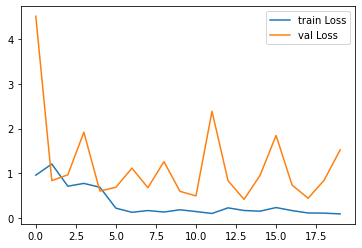

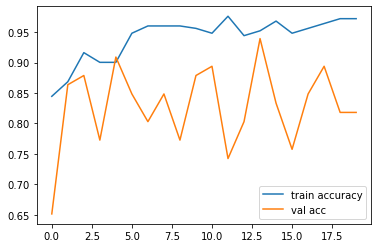

<Figure size 432x288 with 0 Axes>

In [20]:
# plotting the Losses 
plt.plot(MODEL.history['loss'], label='train Loss')
plt.plot(MODEL.history['val_loss'], label='val Loss')
plt.legend()
plt.show()
plt.savefig('loss_valloss')
plt.plot(MODEL.history['Accuracy'], label='train accuracy')
plt.plot(MODEL.history['val_Accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_valAcc')